In [53]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

    Year  Agriculture  Architecture  Art and Performance    Biology  \
37  2007    47.605026     43.100459                 61.4  59.411993   
38  2008    47.570834     42.711730                 60.7  59.305765   
39  2009    48.667224     43.348921                 61.0  58.489583   
40  2010    48.730042     42.066721                 61.3  59.010255   
41  2011    50.037182     42.773438                 61.2  58.742397   

     Business  Communications and Journalism  Computer Science  Education  \
37  49.000459                           62.5              17.6  78.721413   
38  48.888027                           62.4              17.8  79.196327   
39  48.840474                           62.8              18.1  79.532909   
40  48.757988                           62.5              17.6  79.618625   
41  48.180418                           62.2              18.2  79.432812   

    Engineering    English  Foreign Languages  Health Professions  \
37         16.8  67.874923               

In [59]:
last_row = women_degrees[women_degrees['Year'] == max(women_degrees['Year'])]
print(last_row[stem_cats[sp]])

41    43.1
Name: Math and Statistics, dtype: float64


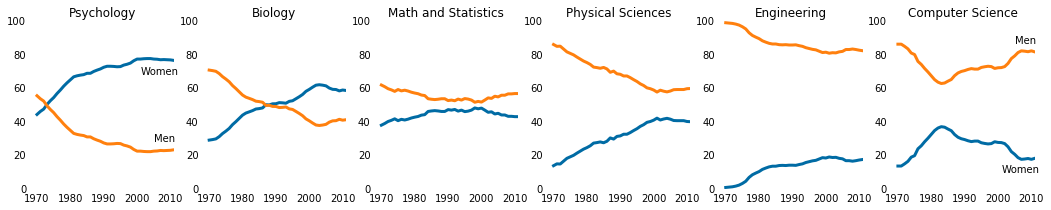

In [162]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)    
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(last_row['Year'] - len('Men')*2, 100 - last_row[stem_cats[sp]] + 5, 'Men')
        ax.text(last_row['Year'] - len('Women')*2, last_row[stem_cats[sp]] - 8, 'Women')
    elif sp == 5:
        ax.text(last_row['Year'] - len('Men')*2, 100 - last_row[stem_cats[sp]] + 5, 'Men')
        ax.text(last_row['Year'] - len('Women')*2, last_row[stem_cats[sp]] - 8, 'Women')
    
plt.show()
plt.close()

In [163]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Engineering', 'Computer Science']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture', 'Business', 'Architecture']

In [166]:
def add_col(majors, col):
    for sp in range(0,len(majors)):        
        ax = fig.add_subplot(6,3,(sp*3)+col)        
        ax.plot(women_degrees['Year'], women_degrees[majors[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[majors[sp]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        ax.set_title(majors[sp])
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')                       
        
        if sp == 0 or sp == (len(majors)-1):
            women_value = last_row[majors[sp]].values
            men_value = 100 - women_value
            
            if men_value > women_value:
                men_adj = 5
                women_adj = -8
            else:
                men_adj = -8
                women_adj = 5
            
            ax.text(last_row['Year'] - len('Men')-.7, 100 - last_row[majors[sp]] + men_adj, 'Men')
            ax.text(last_row['Year'] - len('Women')-.7, last_row[majors[sp]] + women_adj, 'Women')       
            
            if sp == (len(majors)-1):
                ax.tick_params(labelbottom='on')

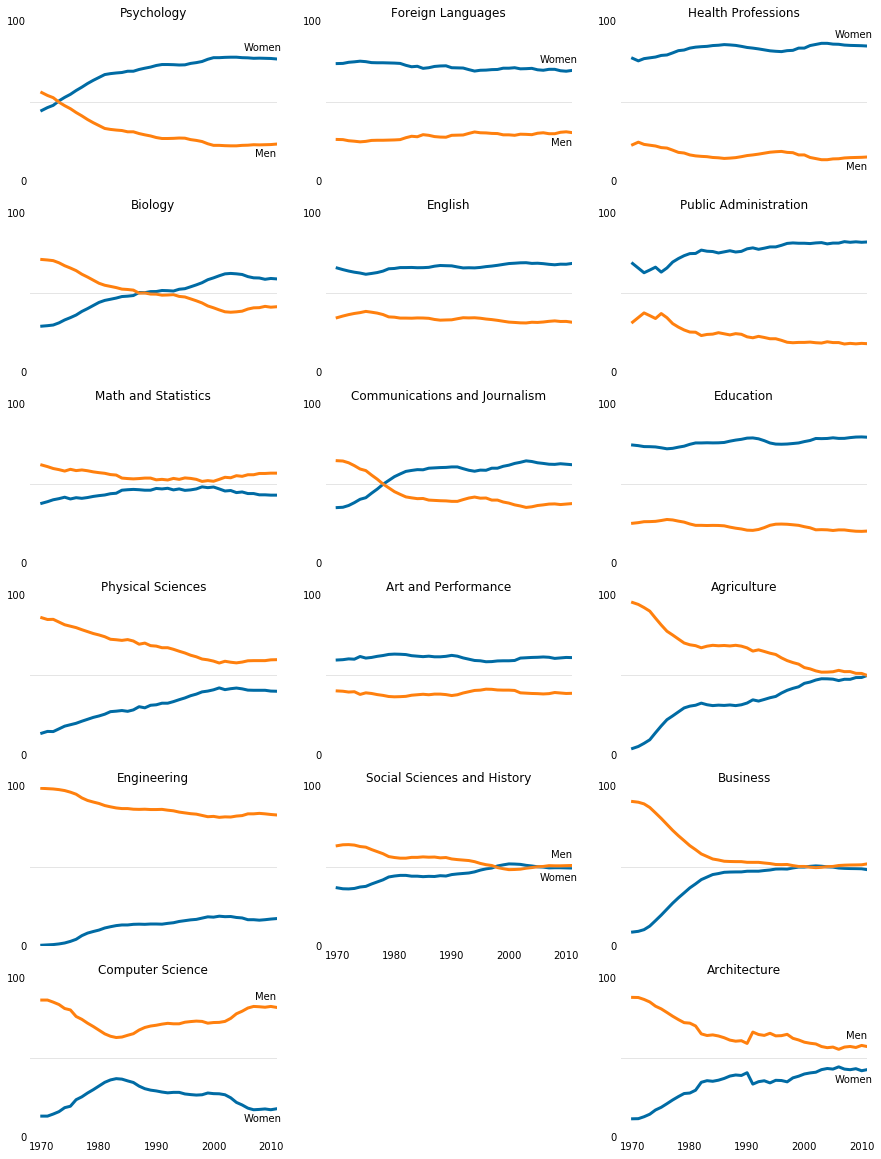

In [167]:
fig = plt.figure(figsize=(15, 20))
add_col(stem_cats, 1)
add_col(lib_arts_cats, 2)
add_col(other_cats, 3)
plt.show()